In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [45]:
# graph styles
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': '#c2d9e7',
    'font.size': 12.0,
    'axes.facecolor': '#c2d9e7',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': False,
    'grid.color': 'white',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#275876', '#64aad4', '#ec866c', '#87d8d6', '#7273a5', '#f9d669']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'font.family': 'Gulim',
})


# # matplotlib counts from the bottom and builds up
# for i, bar in enumerate(ax.patches):
#     value = int(round(bar.get_width()))
#     x_pos = bar.get_width() - 1
#     y_pos = i
# #     ax.text(x_pos, y_pos, value, verticalalignment='center')
#     ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')

# ax.set_xlabel("Average life expectancy")
# ax.set_ylabel("")
# ax.set_title("Europeans really know how to live [forever]", pad=20)
# ax.title.set_fontsize(14)

In [73]:
bias_motivation = pd.read_excel("Table_1_Incidents_Offenses_Victims_and_Known_Offenders_by_Bias_Motivation_2016.xls")
offense_type = pd.read_excel("Table_2_Incidents_Offenses_Victims_and_Known_Offenders_by_Offense_Type_2016.xls")
offender_race = pd.read_excel("Table_3_Offenses_Known_Offenders_Race_and_Ethnicity_by_Offense_Type_2016.xls")

In [74]:
bias_motivation.head()

,Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"Incidents, Offenses, Victims, and Known Offenders",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"by Bias Motivation, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bias motivation,Incidents,Offenses,Victims1,Known\noffenders2,NaN,NaN,NaN
3,Total,6121,7321,7615,5770,NaN,NaN,NaN
4,Single-Bias Incidents,6063,7227,7509,5727,NaN,NaN,NaN


In [75]:
offense_type.head()

,Table 2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,"Incidents, Offenses, Victims, and Known Offenders",NaN,NaN,NaN,NaN,NaN,NaN
1,"by Offense Type, 2016",NaN,NaN,NaN,NaN,NaN,NaN
2,Offense type,Incidents1,Offenses,Victims2,Known\noffenders3,NaN,NaN
3,Total,6121,7321,7615,5770,NaN,NaN
4,Crimes against persons:,3765,4720,4720,4353,NaN,NaN


In [76]:
offender_race.drop([0,1,2,3, 23,24,25,26], inplace=True)

In [77]:
offender_race.columns = offender_race.iloc[0]
offender_race.drop([4,5], inplace=True)

In [78]:
offender_race.columns.values[0] = 'crime_type'
offender_race.columns.values[1] = 'totals'
offender_race.drop(columns='totals', inplace=True)

In [119]:
offender_race.rename(index=str, columns={"White": "white", 2: "black", "American Indian or Alaska Native": "native_amer", "Asian": "asian", "Native Hawaiian or Other Pacific Islander": "native_hawaiian", "Group of multiple races": "multi_race", "Unknown race": "unknown", "Group of multiple ethnicities": "mult_ethnic"}, inplace=True)
offender_race

4,crime_type,white,Black or African American,American Indian or Alaska Native,asian,Native Hawaiian or Other Pacific Islander,Group of multiple races,Unknown race,Hispanic or Latino,Not Hispanic or Latino,Group of multiple ethnicities,Unknown ethnicity,nan
6,Crimes against persons:,2197,1117,35,35,4,199,505,214,856,28,1880,628
7,Murder and nonnegligent manslaughter,4,5,0,0,0,0,0,0,1,0,3,0
8,Rape (revised definition)2,9,6,2,0,0,0,3,2,2,1,14,4
9,Rape (legacy definition)3,0,0,0,0,0,0,0,0,0,0,0,0
10,Aggravated assault,395,268,9,7,1,63,56,69,179,9,313,74
11,Simple assault,764,513,17,9,3,93,184,90,377,14,654,104
12,Intimidation,1015,322,7,19,0,43,262,52,288,4,893,441
13,Other4,10,3,0,0,0,0,0,1,9,0,3,5
14,Crimes against property:,429,194,12,9,3,45,504,40,153,8,564,1323
15,Robbery,25,67,3,0,0,13,11,10,30,1,47,15


In [82]:
offender_race = offender_race.infer_objects()
offender_race.dtypes

4
crime_type                                       object
White                                             int64
Black or\nAfrican\nAmerican                       int64
American\nIndian or\nAlaska Native                int64
Asian                                             int64
Native\nHawaiian\nor Other\nPacific\nIslander     int64
Group of\nmultiple\nraces                         int64
Unknown\nrace                                     int64
Hispanic\nor\nLatino                              int64
Not\nHispanic\nor\nLatino                         int64
Group of\nmultiple\nethnicities                   int64
Unknown\nethnicity                                int64
NaN                                               int64
dtype: object

In [120]:
crimes_against_persons = offender_race.drop([7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
crimes_against_persons.plot(x='crime_type', kind='barh')

KeyError: 'labels [7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22] not contained in axis'

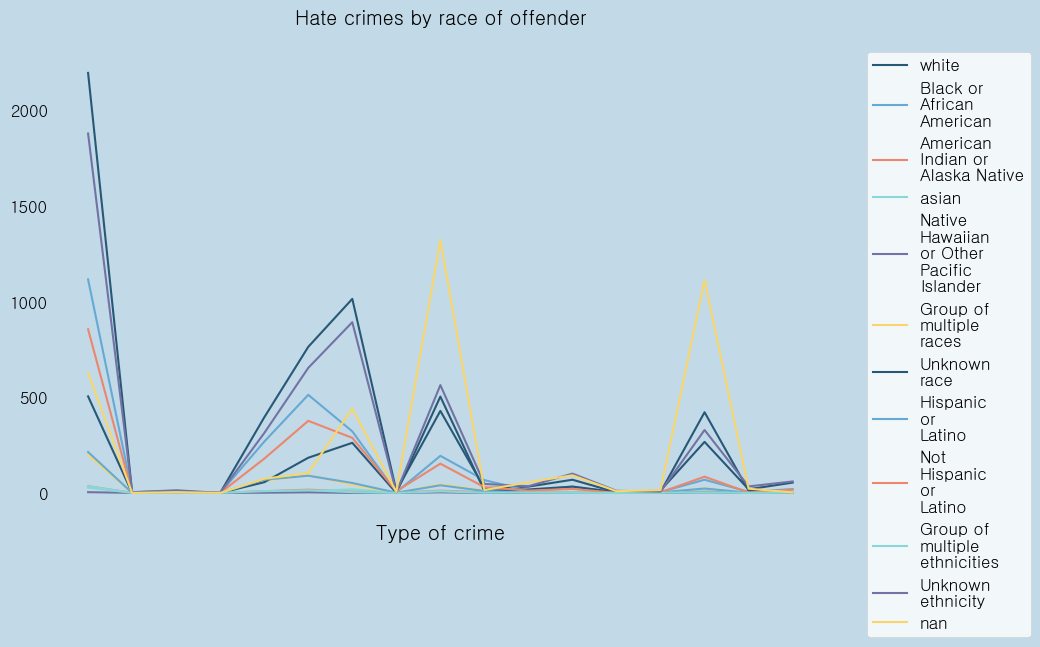

In [127]:
ax = offender_race.plot(x='crime_type', figsize=(10,6))
ax.set_xlabel("Type of crime")
ax.set_ylabel("")
ax.set_title("Hate crimes by race of offender", pad=20)
ax.title.set_fontsize(14)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)